![Titre](C03.jpg)

## <span style='color:#AC1620'> Explication du programme en langage Python</span>

### <span style='color:#163538'> Exercice 24 p 68  : Traitement d'un effluent </span>

**Pour faire fonctionner le programme à l'aide de Jupyter Notebook, il faut exécuter les cellules contenant du code les unes après les autres** 

La première étape consiste à importer :
* le logarithme décimal *log10* de la bibliothèque <span style='color:red' > math </span> ;
* la bibliothèque <span style='color:red' > matplotlib.pyplot </span> avec l'alias *plt*. Elle sert à réaliser le graphique ;
* la bibliothèque <span style='color:red' > numpy </span> avec l'alias *np* . Elle est utile pour de nombreux outils mathématiques.

In [18]:
from math import log10
### Bibliothèques importées
import numpy as np
import matplotlib.pyplot as plt

On définit l'ensemble des constantes et variables utilisées dans ce programme :
* *VE* est le volume versé à l'équivalence, exprimé en L. Il vaut $13 \times 10^{-3}~ \mathrm{L}$ ;
* *Veff* est le volume d'effluent à traiter, exprimé en L. Il vaut $200~ \mathrm{L}$ ; 
* *compteur* est un compter initialisé à 0, utilisé plus loin dans le programme.

In [19]:
### Définition des variables
VE=13*0.001
Veff=200    
compteur=0    

On calcule la quantité de matière initiale en ion hydroxyde présente dans l'effluent. D'après la réaction support du titrage : 
$$ n(\mathrm{HO^-})=n(\mathrm{H_3O^+})_E = Veff \times \frac{[\mathrm{H_3O^+}] \times VE}{V_0} $$
où $V_0$ est le volume d'effluent pour le titrage conductimétrique en B. Ainsi : 
$$n(\mathrm{HO^-})_{\mathrm{initial}}= Veff \times \frac{5,0 \times 10^{-2} \times VE}{1,0 \times 10^{-3}}$$

In [20]:
nHOinitial=Veff*(0.05*VE/0.001)  

On définit ensuite le volume maximal _Vmax_ à introduire. Il correspond à une quantité de matière en ion oxonium deux fois plus importante que la quantité de matière en ion hydroxyde. C'est une valeur entière qui est retenue. Ainsi : 
$$n(\mathrm{H_3O^+})= 2 \times n(\mathrm{HO^-})_{\mathrm{initial}} = [\mathrm{H_3O^+}] \times Vmax \Rightarrow Vmax= \frac{\displaystyle 2 \times n(\mathrm{HO^-})_{\mathrm{initial}}}{\displaystyle [\mathrm{H_3O^+}]}= \frac{\displaystyle 2 \times n(\mathrm{HO^-})_{\mathrm{initial}}}{\displaystyle 10}$$

In [21]:
Vmax=int(2*(nHOinitial/10))

On initialise les listes qui seront utiles :
* _nOH_ correspond à la quantité de matière en ions hydroxyde ;
* _nH_ correspond à la quantité de matière en ions oxonium ; 
* _pH_ est la liste qui rassemble les valeurs du pH ; 
* _V_ est la liste qui rassemble les volumes versés en solution d'acide chlorhydrique.

In [22]:
nHO, nH, pH, V = [nHOinitial], [0], [-log10(1E-14/(nHOinitial/Veff))], [0] 

On remplit alors les listes à l'aide du compteur _compteur_ qui correspond au volume versé en solution d'acide. Pour cela en rentre dans une boucle ``while`` qui tournera tant que le compteur est inférieur ou égal à _Vmax_.

On initialise une variable _aux_ qui correspond à la quantité de matière en ions hydroxyde qu'il reste dans la solution d'effluent : 
$$aux = n(\mathrm{HO^-})_{\mathrm{initial}} - [\mathrm{H_3O^+}] \times V = nOHinitial - 10 \times compteur$$.

On rentre alors dans un boucle conditionnelle : 
* Si _aux_ est supérieure à 0, cela signifie que l'on est avant l'équivalence : 
    * La quantité de matière en ions hydroxyde est égale à _aux_. On complète la liste.
    * La quantité de matière en ion oxonium est nulle.
    * Le pH se déduit de la concentration en ion hydroxyde : 
    $$pH = - \log \left( \frac{\displaystyle \mathrm{Ke}}{\displaystyle [\mathrm{HO^-}]} \right) = - \log \left( \frac{\displaystyle \mathrm{Ke}\times (Veff+ V)}{\displaystyle n(\mathrm{HO^-})} \right)= - \log \left( \frac{\displaystyle 1,0 \times 10^{-14}\times (Veff+ V)}{\displaystyle aux} \right) $$

* Si la quantité d'ions oxonium versée est supérieur à la quantité initiale en ion hydroxyde _nOHinitial_, cela signifie que l'équivalence est dépassée : 
    * La quantité de matière en ions hydroxyde est nulle.
    * La quantité de matière en ion oxonium vaut : 
    $$n(\mathrm{H_3O^+}) = [\mathrm{H_3O^+}] \times V - n(\mathrm{HO^-})_{\mathrm{initial}} = 10 \times compteur -  nOHinitial$$
    * Le pH se déduit de la concentration en ions oxonium : 
    $$pH = - \log \left( [\mathrm{H_3O^+}] \right)=- \log \left( \frac{\displaystyle n(\mathrm{H_3O^+}) }{\displaystyle Veff + V} \right)=- \log \left( \frac{\displaystyle n(\mathrm{H_3O^+}) }{\displaystyle Veff + compteur} \right)  $$

* Sinon, cela signifie que le volume correspond au volume équivalent le pH est alors égal à 7.
    

In [23]:
### Remplissage des listes
while compteur <= Vmax :
    compteur=compteur+1
    aux=nHOinitial-10*compteur
    if aux > 0 :
        nHO.append(aux)
        nH.append(0)
        V.append(compteur)
        pH.append(- log10(1E-14/(aux/(Veff+compteur))))   #expression du pH si on connaît [HO-]
    elif 10*compteur-nHOinitial > 0 :
        nHO.append(0)
        nH.append(10*compteur-nHOinitial)
        V.append(compteur)
        pH.append(- log10(nH[compteur]/(Veff+compteur)))
    else :
        nHO.append(0)
        nH.append(0)
        V.append(compteur)
        pH.append(7)

On trace le graphique à l'aide des fonctions de la bibliothèque <span style='color:red' > matplotlib.pyplot </span>.

On crée une figure de 1600 pixels de large sur 800 pixels de haut à l'aide de la commande (``plt.figure(figsize=(16,8))``)
On crée deux sous-figures à l'aide de la commande ``plt.subplot()``.

Pour chaque sous-figure : 
* ``plt.plot(x,y,args)`` permet de tracer la courbe souhaitée;
* ``plt.legend()`` permet d'insérer sur le graphique une légende pour chacune des courbes ;
* ``plt.ylim()`` permet de fixer les limites de l'axe des ordonnées ;
* ``plt.xlabel()`` permet d'ajouter un titre à l'axe des abscisses ;
* ``plt.ylabel()`` permet d'ajouter un titre à l'axe des ordonnées.

Enfin,  ``plt.show()`` permet d'afficher le graphique ainsi obtenu.

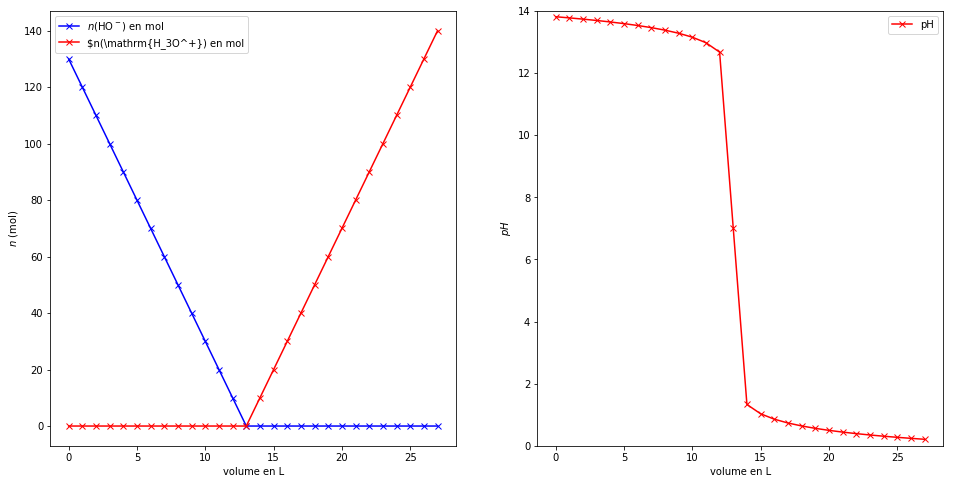

In [26]:
### Affichage des graphiques
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(V, nHO, 'bx-', label="$n(\mathrm{HO^-})$ en mol")
plt.plot(V, nH, 'rx-', label="$n(\mathrm{H_3O^+}) en mol")
plt.xlabel("volume en L")
plt.ylabel('$n$ (mol)')
plt.legend()
plt.subplot(122)
plt.ylim(0,14) #définition des valeurs max et min des ordonnées
plt.plot(V, pH, 'rx-', label="pH")
plt.xlabel("volume en L")
plt.ylabel('$pH$')
plt.legend()
plt.show()